<a href="https://colab.research.google.com/github/dvircohen0/GAN/blob/main/GAN_tf_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255
X_test /= 255


In [4]:
from tqdm import tqdm
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout 
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt

np.random.seed(1000)
randomDim = 100

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
adam = Adam(lr=0.0002, beta_1=0.5)
generator.compile(loss='binary_crossentropy', optimizer=adam)

discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

def train(epochs, batchSize):
    batchCount = int(X_train.shape[0] / batchSize)
    
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount)):
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])
            yDis = np.zeros(2*batchSize)
            yDis[:batchSize] = 1
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)
train(100, 128)
 

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  0%|          | 2/468 [00:00<00:29, 15.97it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.69it/s]

--------------- Epoch 3 ---------------


  1%|          | 3/468 [00:00<00:21, 21.90it/s]

--------------- Epoch 4 ---------------


  1%|          | 3/468 [00:00<00:21, 21.73it/s]

--------------- Epoch 5 ---------------


  1%|          | 3/468 [00:00<00:22, 21.01it/s]

--------------- Epoch 6 ---------------


  1%|          | 3/468 [00:00<00:21, 21.15it/s]

--------------- Epoch 7 ---------------


  0%|          | 2/468 [00:00<00:26, 17.44it/s]

--------------- Epoch 8 ---------------


  1%|          | 3/468 [00:00<00:23, 20.09it/s]

--------------- Epoch 9 ---------------


  1%|          | 3/468 [00:00<00:21, 21.29it/s]

--------------- Epoch 10 ---------------


  0%|          | 2/468 [00:00<00:24, 18.80it/s]

--------------- Epoch 11 ---------------


  1%|          | 3/468 [00:00<00:22, 20.80it/s]

--------------- Epoch 12 ---------------


  0%|          | 2/468 [00:00<00:23, 19.58it/s]

--------------- Epoch 13 ---------------


  1%|          | 3/468 [00:00<00:21, 21.75it/s]

--------------- Epoch 14 ---------------


  0%|          | 2/468 [00:00<00:24, 19.37it/s]

--------------- Epoch 15 ---------------


  1%|          | 3/468 [00:00<00:24, 19.32it/s]

--------------- Epoch 16 ---------------


  1%|          | 3/468 [00:00<00:22, 21.12it/s]

--------------- Epoch 17 ---------------


  1%|          | 3/468 [00:00<00:21, 21.53it/s]

--------------- Epoch 18 ---------------


  1%|          | 3/468 [00:00<00:22, 20.94it/s]

--------------- Epoch 19 ---------------


  1%|          | 3/468 [00:00<00:21, 21.17it/s]

--------------- Epoch 20 ---------------


  1%|          | 3/468 [00:00<00:22, 20.55it/s]

--------------- Epoch 21 ---------------


  1%|          | 3/468 [00:00<00:21, 21.75it/s]

--------------- Epoch 22 ---------------


  1%|          | 3/468 [00:00<00:21, 21.60it/s]

--------------- Epoch 23 ---------------


  1%|          | 3/468 [00:00<00:21, 21.29it/s]

--------------- Epoch 24 ---------------


  1%|          | 3/468 [00:00<00:23, 20.21it/s]

--------------- Epoch 25 ---------------


  1%|          | 3/468 [00:00<00:22, 21.13it/s]

--------------- Epoch 26 ---------------


  1%|          | 3/468 [00:00<00:21, 21.34it/s]

--------------- Epoch 27 ---------------


  1%|          | 3/468 [00:00<00:21, 21.26it/s]

--------------- Epoch 28 ---------------


  0%|          | 2/468 [00:00<00:23, 19.92it/s]

--------------- Epoch 29 ---------------


  1%|          | 3/468 [00:00<00:23, 19.76it/s]

--------------- Epoch 30 ---------------


  1%|          | 3/468 [00:00<00:21, 21.41it/s]

--------------- Epoch 31 ---------------


  1%|          | 3/468 [00:00<00:22, 20.81it/s]

--------------- Epoch 32 ---------------


  1%|          | 3/468 [00:00<00:20, 22.62it/s]

--------------- Epoch 33 ---------------


  0%|          | 2/468 [00:00<00:23, 19.58it/s]

--------------- Epoch 34 ---------------


  1%|          | 3/468 [00:00<00:21, 21.85it/s]

--------------- Epoch 35 ---------------


  1%|          | 3/468 [00:00<00:22, 20.92it/s]

--------------- Epoch 36 ---------------


  1%|          | 3/468 [00:00<00:21, 21.79it/s]

--------------- Epoch 37 ---------------


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 38 ---------------


  1%|          | 3/468 [00:00<00:21, 21.38it/s]

--------------- Epoch 39 ---------------


  1%|          | 3/468 [00:00<00:21, 21.69it/s]

--------------- Epoch 40 ---------------


  1%|          | 3/468 [00:00<00:22, 20.75it/s]

--------------- Epoch 41 ---------------


  1%|          | 3/468 [00:00<00:22, 21.08it/s]

--------------- Epoch 42 ---------------


  1%|          | 3/468 [00:00<00:21, 21.27it/s]

--------------- Epoch 43 ---------------


  1%|          | 3/468 [00:00<00:21, 21.93it/s]

--------------- Epoch 44 ---------------


  1%|          | 3/468 [00:00<00:21, 22.08it/s]

--------------- Epoch 45 ---------------


  1%|          | 3/468 [00:00<00:21, 21.35it/s]

--------------- Epoch 46 ---------------


  1%|          | 3/468 [00:00<00:21, 21.25it/s]

--------------- Epoch 47 ---------------


  1%|          | 3/468 [00:00<00:22, 20.97it/s]

--------------- Epoch 48 ---------------


  1%|          | 3/468 [00:00<00:22, 21.07it/s]

--------------- Epoch 49 ---------------


  0%|          | 2/468 [00:00<00:23, 19.66it/s]

--------------- Epoch 50 ---------------


  1%|          | 3/468 [00:00<00:21, 21.50it/s]

--------------- Epoch 51 ---------------


  0%|          | 2/468 [00:00<00:23, 19.79it/s]

--------------- Epoch 52 ---------------


  1%|          | 3/468 [00:00<00:21, 21.30it/s]

--------------- Epoch 53 ---------------


  1%|          | 3/468 [00:00<00:22, 20.85it/s]

--------------- Epoch 54 ---------------


  1%|          | 3/468 [00:00<00:21, 21.81it/s]

--------------- Epoch 55 ---------------


  1%|          | 3/468 [00:00<00:22, 20.99it/s]

--------------- Epoch 56 ---------------


  1%|          | 3/468 [00:00<00:22, 20.83it/s]

--------------- Epoch 57 ---------------


  1%|          | 3/468 [00:00<00:22, 20.46it/s]

--------------- Epoch 58 ---------------


  1%|          | 3/468 [00:00<00:21, 21.54it/s]

--------------- Epoch 59 ---------------


  0%|          | 2/468 [00:00<00:24, 19.29it/s]

--------------- Epoch 60 ---------------


  0%|          | 2/468 [00:00<00:23, 19.67it/s]

--------------- Epoch 61 ---------------


  1%|          | 3/468 [00:00<00:21, 21.38it/s]

--------------- Epoch 62 ---------------


  1%|          | 3/468 [00:00<00:22, 20.97it/s]

--------------- Epoch 63 ---------------


  0%|          | 2/468 [00:00<00:23, 19.75it/s]

--------------- Epoch 64 ---------------


  1%|          | 3/468 [00:00<00:21, 21.23it/s]

--------------- Epoch 65 ---------------


  1%|          | 3/468 [00:00<00:22, 21.10it/s]

--------------- Epoch 66 ---------------


  1%|          | 3/468 [00:00<00:22, 21.03it/s]

--------------- Epoch 67 ---------------


  1%|          | 3/468 [00:00<00:21, 21.36it/s]

--------------- Epoch 68 ---------------


  1%|          | 3/468 [00:00<00:21, 22.12it/s]

--------------- Epoch 69 ---------------


  1%|          | 3/468 [00:00<00:22, 20.55it/s]

--------------- Epoch 70 ---------------


  1%|          | 3/468 [00:00<00:21, 21.83it/s]

--------------- Epoch 71 ---------------


  1%|          | 3/468 [00:00<00:22, 20.91it/s]

--------------- Epoch 72 ---------------


  1%|          | 3/468 [00:00<00:21, 21.93it/s]

--------------- Epoch 73 ---------------


  1%|          | 3/468 [00:00<00:21, 21.60it/s]

--------------- Epoch 74 ---------------


  0%|          | 2/468 [00:00<00:24, 19.40it/s]

--------------- Epoch 75 ---------------


  0%|          | 2/468 [00:00<00:23, 19.46it/s]

--------------- Epoch 76 ---------------


  1%|          | 3/468 [00:00<00:21, 21.17it/s]

--------------- Epoch 77 ---------------


  1%|          | 3/468 [00:00<00:22, 20.94it/s]

--------------- Epoch 78 ---------------


  0%|          | 2/468 [00:00<00:24, 18.87it/s]

--------------- Epoch 79 ---------------


  1%|          | 3/468 [00:00<00:21, 21.15it/s]

--------------- Epoch 80 ---------------


  1%|          | 3/468 [00:00<00:21, 21.54it/s]

--------------- Epoch 81 ---------------


  1%|          | 3/468 [00:00<00:21, 21.95it/s]

--------------- Epoch 82 ---------------


  1%|          | 3/468 [00:00<00:21, 21.56it/s]

--------------- Epoch 83 ---------------


  1%|          | 3/468 [00:00<00:22, 20.82it/s]

--------------- Epoch 84 ---------------


  1%|          | 3/468 [00:00<00:21, 21.21it/s]

--------------- Epoch 85 ---------------


  1%|          | 3/468 [00:00<00:21, 21.46it/s]

--------------- Epoch 86 ---------------


  1%|          | 3/468 [00:00<00:20, 22.46it/s]

--------------- Epoch 87 ---------------


  1%|          | 3/468 [00:00<00:22, 20.85it/s]

--------------- Epoch 88 ---------------


  0%|          | 2/468 [00:00<00:24, 19.12it/s]

--------------- Epoch 89 ---------------


  0%|          | 2/468 [00:00<00:23, 19.59it/s]

--------------- Epoch 90 ---------------


  1%|          | 3/468 [00:00<00:21, 21.98it/s]

--------------- Epoch 91 ---------------


  1%|          | 3/468 [00:00<00:22, 20.98it/s]

--------------- Epoch 92 ---------------


  0%|          | 2/468 [00:00<00:24, 19.40it/s]

--------------- Epoch 93 ---------------


  1%|          | 3/468 [00:00<00:21, 21.25it/s]

--------------- Epoch 94 ---------------


  1%|          | 3/468 [00:00<00:21, 21.93it/s]

--------------- Epoch 95 ---------------


  1%|          | 3/468 [00:00<00:22, 21.10it/s]

--------------- Epoch 96 ---------------


  1%|          | 3/468 [00:00<00:21, 21.53it/s]

--------------- Epoch 97 ---------------


  0%|          | 2/468 [00:00<00:23, 19.67it/s]

--------------- Epoch 98 ---------------


  1%|          | 3/468 [00:00<00:22, 20.59it/s]

--------------- Epoch 99 ---------------


  1%|          | 3/468 [00:00<00:21, 21.28it/s]

--------------- Epoch 100 ---------------


100%|██████████| 468/468 [00:22<00:00, 20.79it/s]


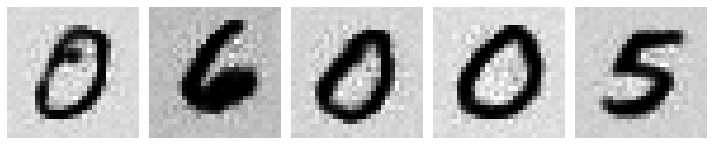

In [5]:
examples=5
dim=(1,5)
figsize=(10, 10)
noise = np.random.normal(0, 1, size=[examples, randomDim])
generatedImages = generator.predict(noise)
generatedImages = generatedImages.reshape(examples, 28, 28)

plt.figure(figsize=figsize)
for i in range(generatedImages.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.tight_layout()